In [1]:
import os, datetime
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorboard.compat.tensorflow_stub.dtypes import float32
from tensorflow import keras, int32
from tensorflow.keras import layers
from tensorflow.python.keras.engine.base_layer_utils import training_arg_passed_to_call


In [2]:
data = pd.read_csv('datasets/life_expectancy.csv')
data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2270,Serbia,2010,Developing,74.4,128.0,1,9.65,774.439662,89.0,20,...,91.0,1.90,91.0,0.1,5411.877440,7291436.0,2.2,2.3,0.755,13.6
1030,Greece,2011,Developing,85.0,76.0,0,8.02,3192.887363,95.0,40,...,99.0,9.77,99.0,0.1,25916.293530,1114899.0,0.8,0.7,0.860,16.7
2076,Qatar,2010,Developing,77.3,76.0,0,1.16,37.768488,97.0,295,...,98.0,2.90,97.0,0.1,736.227840,NaN,5.0,4.6,0.825,12.0
2676,Tunisia,2004,Developing,74.0,15.0,3,1.36,379.765905,96.0,1,...,97.0,5.63,97.0,0.1,3112.835290,11761.0,6.4,6.3,0.673,13.6
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,119714696.0,27.0,27.9,0.556,10.2


In [3]:
data.shape

(2938, 22)

In [4]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
countries = data['Country'].unique()

na_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
           ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
           ' thinness  1-19 years', ' thinness 5-9 years', 'Population',
           'Income composition of resources', 'Schooling']

for col in na_cols:
    for country in countries:
        data.loc[data['Country']==country, col] = (data.loc[data['Country']==country, col].fillna(data[data['Country']==country][col].mean()))

In [6]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
data = data.dropna()
data.shape

(2128, 22)

In [8]:
data['Status'].value_counts()

Status
Developing    1824
Developed      304
Name: count, dtype: int64

In [9]:
data['Country'].value_counts()

Country
Afghanistan    16
Albania        16
Algeria        16
Angola         16
Argentina      16
               ..
Uruguay        16
Uzbekistan     16
Vanuatu        16
Zambia         16
Zimbabwe       16
Name: count, Length: 133, dtype: int64

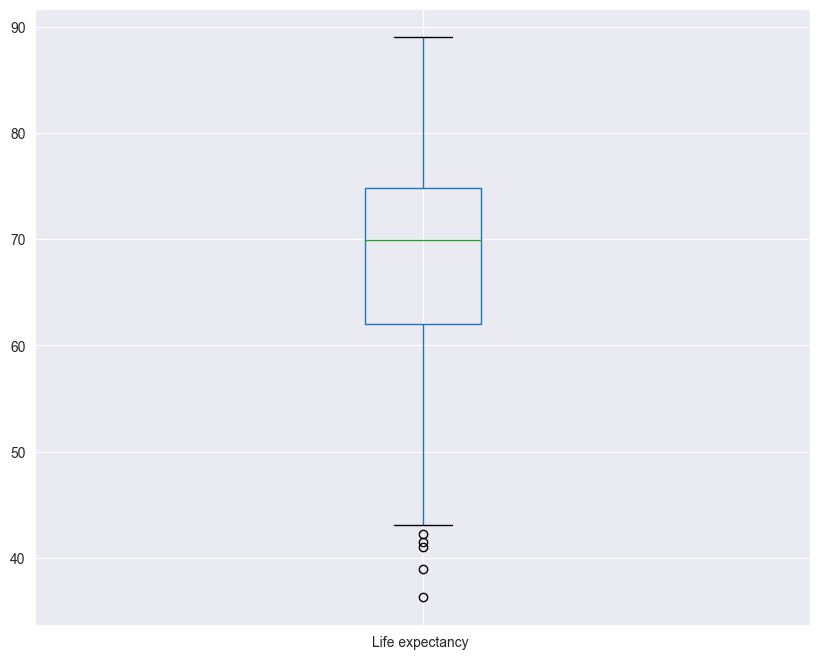

In [10]:
plt.figure(figsize=(10, 8))
data.boxplot('Life expectancy ')
plt.show()

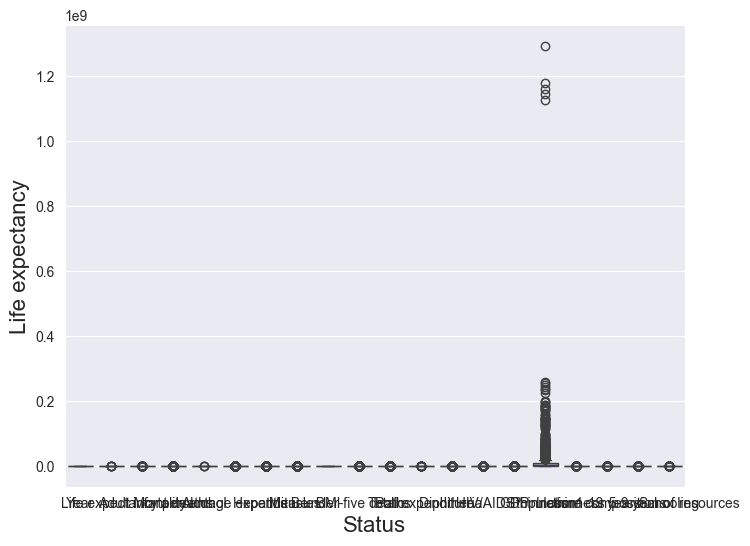

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Life expectancy', fontsize = 16)
plt.show()

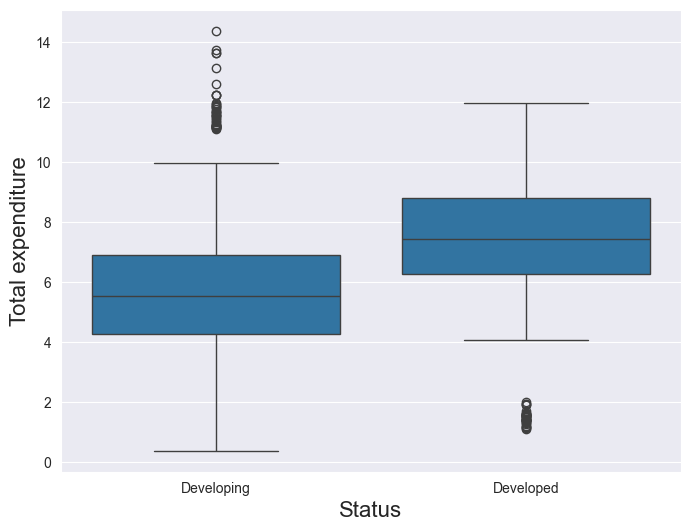

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Status'], y=data['Total expenditure'])
plt.xlabel('Status', fontsize = 16)
plt.ylabel('Total expenditure', fontsize = 16)
plt.show()

In [23]:
data_corr = data[['Life expectancy ', 
                  'Adult Mortality',
                  'Total expenditure', 
                  'Diphtheria ', 
                  'GDP',
                  'Population']].corr()
data_corr

,Life expectancy,Adult Mortality,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.097938,-0.212157,-0.259500,-0.021050
Total expenditure,0.203689,-0.097938,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.079752,-0.024167,-0.016800,1.000000


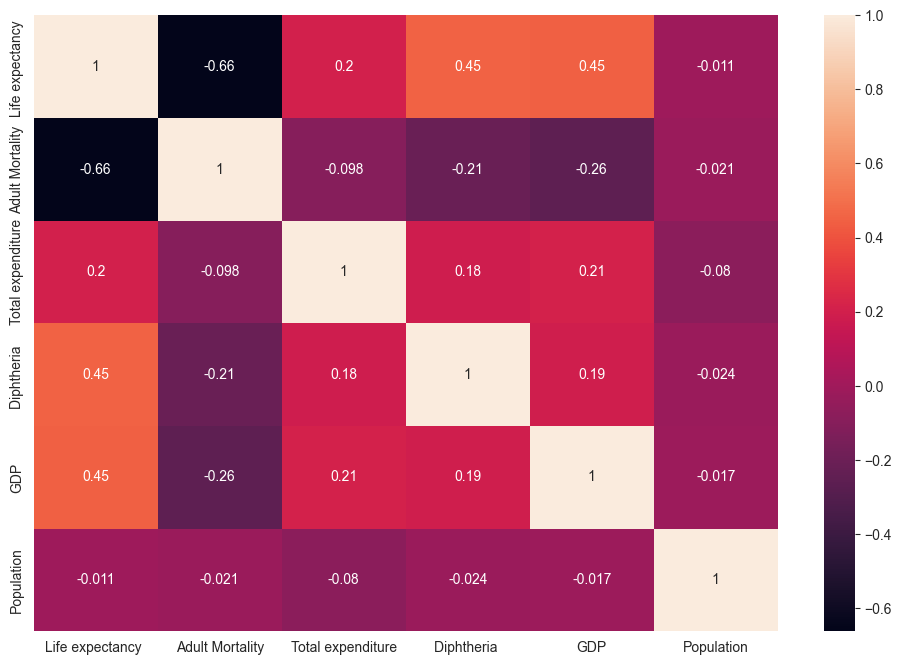

In [24]:
fix, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data_corr, annot=True)
plt.show()

In [25]:
features = data.drop('Life expectancy ', axis=1)
target = data['Life expectancy ']

In [26]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
target.sample(5)

599     61.0
1862    74.5
2723    54.9
2660    69.4
760     62.0
Name: Life expectancy , dtype: float64

In [29]:
features.drop('Country', axis=1, inplace=True)
features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [30]:
categorical_features = features['Status'].copy()
categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [55]:
categorical_features = pd.get_dummies(categorical_features, dtype=float)
categorical_features.head()

,Developed,Developing
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [60]:
categorical_features['Developed'] = categorical_features['Developed'].astype(int)
categorical_features['Developing'] = categorical_features['Developing'].astype(int)
categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [61]:
numeric_features = features.drop(['Status'], axis=1)
numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [62]:
numeric_features.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03,2128.000000,2128.000000,2128.000000,2128.000000
mean,2007.500000,174.300282,35.902726,4.436893,640.072009,77.272061,2657.467105,36.691964,49.817199,80.572006,5.888411,80.699919,2.173637,5408.637801,1.340066e+07,5.107895,5.177538,0.607481,11.691823
std,4.610856,129.759274,136.224732,3.962858,1710.798798,25.260036,11912.236064,19.843731,185.152708,24.170053,2.256161,24.174256,5.827273,11374.230200,6.315714e+07,4.711951,4.805378,0.203404,3.203263
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.750000,76.000000,1.000000,0.827500,19.883256,68.000000,0.000000,18.400000,1.000000,75.000000,4.367500,76.000000,0.100000,395.911290,1.989615e+05,1.600000,1.600000,0.476750,9.800000
50%,2007.500000,152.000000,4.000000,3.735000,83.677991,87.000000,20.000000,38.850000,4.000000,91.000000,5.800000,91.000000,0.100000,1351.177885,1.433672e+06,3.400000,3.400000,0.649500,11.900000
75%,2011.250000,241.250000,24.000000,7.162500,431.365149,95.000000,459.250000,55.200000,34.250000,96.000000,7.333000,96.000000,1.300000,4494.285047,7.785482e+06,7.525000,7.600000,0.747000,13.800000
max,2015.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.600000,2500.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.937000,20.700000


In [63]:
standardScaler = StandardScaler()
numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns, 
                                index=numeric_features.index)
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,0.000000e+00,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,-5.342427e-17,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,0.000000e+00,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,1.402387e-16,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,1.335607e-17,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,3.005115e-17,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,0.000000e+00,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,4.674623e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.669508e-17,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,8.347542e-17,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [64]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)
processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [65]:
processed_features.shape

(2128, 21)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(processed_features, target, test_size = 0.2, random_state = 1)

In [68]:
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((1702, 21), (426, 21), (1702,), (426,))